The EPA's current 24 hour standard for ozone is 0.070 parts per million (ppm) as the fourth-highest daily maximum 8-hour concentration, averaged across three consecutive years. In this study, I will look only at the daily average 8-hour concentrations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load 1999 data and perform exploratory data analysis

In [2]:
ozone0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_1999.csv', low_memory=False) 

In [3]:
print(ozone0.info()) #provides basic information on data
print(ozone0.ndim) #provides dimensions
print(ozone0.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317682 entries, 0 to 317681
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           317682 non-null  object 
 1   County Code          317682 non-null  int64  
 2   Site Num             317682 non-null  int64  
 3   Parameter Code       317682 non-null  int64  
 4   POC                  317682 non-null  int64  
 5   Latitude             317682 non-null  float64
 6   Longitude            317682 non-null  float64
 7   Datum                317682 non-null  object 
 8   Parameter Name       317682 non-null  object 
 9   Sample Duration      317682 non-null  object 
 10  Pollutant Standard   317682 non-null  object 
 11  Date Local           317682 non-null  object 
 12  Units of Measure     317682 non-null  object 
 13  Event Type           317682 non-null  object 
 14  Observation Count    317682 non-null  int64  
 15  Observation Perce

In [4]:
#There are 317,682 rows and 29 columns. Because there are so many columns, look at the first five rows and first 10 columns
ozone0.iloc[:5, :10]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration
0,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
1,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
2,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
3,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
4,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR


In [5]:
#Look at the first five rows and next 9 columns
ozone0.iloc[:5, 11:20]

,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
0,1999-02-28,Parts per million,None,1,6.0,0.029000,0.029,23,27
1,1999-03-01,Parts per million,None,17,100.0,0.027118,0.047,10,44
2,1999-03-02,Parts per million,None,17,100.0,0.049647,0.060,12,67
3,1999-03-03,Parts per million,None,17,100.0,0.039059,0.044,11,41
4,1999-03-04,Parts per million,None,17,100.0,0.032529,0.044,9,41


In [6]:
#Look at the first five rows and the final columns
ozone0.iloc[:5, 21:]

,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
1,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
2,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
3,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
4,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20


### Clean 1999 dataset

In [7]:
#Check whether there are excluded observations in event type
ozone0.groupby('Event Type').size()

Event Type
Excluded        19
Included     18925
None        298738
dtype: int64

In [8]:
#remove excluded event type observations
ozone0Cleaned = ozone0[ozone0['Event Type'] !=  'Excluded']

In [9]:
#check for state codes of 80 or CC (Country of Mexico or Canada) in ozone0Cleaned because
#data type of the state code is an object
print(np.count_nonzero(ozone0Cleaned['State Code']== '80' ))
print(np.count_nonzero(ozone0Cleaned['State Code']== 'CC' ))

3061
188


In [10]:
#remove observations from Mexico and Canada
ozone0ReCleaned = ozone0Cleaned[ozone0Cleaned['State Code'] != '80']
ozone0Recleaned = ozone0ReCleaned[ozone0ReCleaned['State Code'] != 'CC']
ozone0Recleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314414 entries, 0 to 314432
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           314414 non-null  object 
 1   County Code          314414 non-null  int64  
 2   Site Num             314414 non-null  int64  
 3   Parameter Code       314414 non-null  int64  
 4   POC                  314414 non-null  int64  
 5   Latitude             314414 non-null  float64
 6   Longitude            314414 non-null  float64
 7   Datum                314414 non-null  object 
 8   Parameter Name       314414 non-null  object 
 9   Sample Duration      314414 non-null  object 
 10  Pollutant Standard   314414 non-null  object 
 11  Date Local           314414 non-null  object 
 12  Units of Measure     314414 non-null  object 
 13  Event Type           314414 non-null  object 
 14  Observation Count    314414 non-null  int64  
 15  Observation Perce

### Extract arithmetic mean from 1999 dataset as series and print descriptive statistics

In [11]:
x0Updated = ozone0ReCleaned['Arithmetic Mean']
x0Updated.describe()

count    314602.000000
mean          0.033326
std           0.015278
min           0.000000
25%           0.022059
50%           0.032471
75%           0.043235
max           0.111529
Name: Arithmetic Mean, dtype: float64

### Load 2012 data and perform exploratory data analysis

In [12]:
ozone1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2012.csv') 

In [13]:
print(ozone1.info()) 
print(ozone1.ndim) 
print(ozone1.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386439 entries, 0 to 386438
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           386439 non-null  int64  
 1   County Code          386439 non-null  int64  
 2   Site Num             386439 non-null  int64  
 3   Parameter Code       386439 non-null  int64  
 4   POC                  386439 non-null  int64  
 5   Latitude             386439 non-null  float64
 6   Longitude            386439 non-null  float64
 7   Datum                386439 non-null  object 
 8   Parameter Name       386439 non-null  object 
 9   Sample Duration      386439 non-null  object 
 10  Pollutant Standard   386439 non-null  object 
 11  Date Local           386439 non-null  object 
 12  Units of Measure     386439 non-null  object 
 13  Event Type           386439 non-null  object 
 14  Observation Count    386439 non-null  int64  
 15  Observation Perce

### Clean 2012 dataset

In [14]:
#Check whether there are excluded observations in event type
ozone1.groupby('Event Type').size()

Event Type
Excluded       354
Included     12538
None        373547
dtype: int64

In [15]:
#remove excluded event type observations
ozone1Cleaned = ozone1[ozone1['Event Type'] !=  'Excluded']

In [16]:
#check for state codes of 80 and CC in ozone1Cleaned
print(np.count_nonzero(ozone1Cleaned['State Code']== 80))
print(np.count_nonzero(ozone1Cleaned['State Code']== 'CC'))

1432
0


In [17]:
#remove observations with state codes of 80
ozone1ReCleaned = ozone1Cleaned[ozone1Cleaned['State Code']!= 80]

### Extract arithmetic mean from 2012 dataset as series and print descriptive statistics

In [18]:
x1Updated = ozone1ReCleaned['Arithmetic Mean']
x1Updated.describe()

count    384653.000000
mean          0.033305
std           0.012699
min           0.000000
25%           0.024176
50%           0.032706
75%           0.041765
max           0.097100
Name: Arithmetic Mean, dtype: float64

### Read in 2020 dataset

In [19]:
ozone2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2020.csv')

### Clean 2020 dataset

In [20]:
#Check whether there are excluded observations in event type
ozone2.groupby('Event Type').size()

Event Type
Excluded       369
Included      8208
None        383346
dtype: int64

In [21]:
#remove excluded event type observations
ozone2Cleaned = ozone2[ozone2['Event Type'] !=  'Excluded']

In [22]:
#check for state codes of 80 in ozone2Cleaned
np.count_nonzero(ozone2Cleaned['State Code']== 80)

146

In [23]:
#remove observations with state codes of 80
ozone2ReCleaned = ozone2Cleaned[ozone2Cleaned['State Code']!= 80]

### Extract arithmetic mean from 2020 dataset as series and print descriptive statistics

In [24]:
x2Updated = ozone2ReCleaned['Arithmetic Mean']
x2Updated.describe() 

count    391408.000000
mean          0.030800
std           0.010755
min          -0.003300
25%           0.023235
50%           0.030647
75%           0.038059
max           0.135529
Name: Arithmetic Mean, dtype: float64

In [25]:
#Look into the number of negative numbers in ozone 2020 dataset
countNegativeValues = np.count_nonzero(x2Updated < 0) #find count of negative values
print(countNegativeValues)
print((countNegativeValues / len(ozone2)) * 100) #find percentage of negative values 

4
0.0010206086399624417


In [26]:
#Ignore the 2 negative values in the 2020 dataset.

### Compare aggregate changes in ozone for years 1999, 2012, and 2020

Text(0, 0.5, 'Ozone concentration (ppm)')

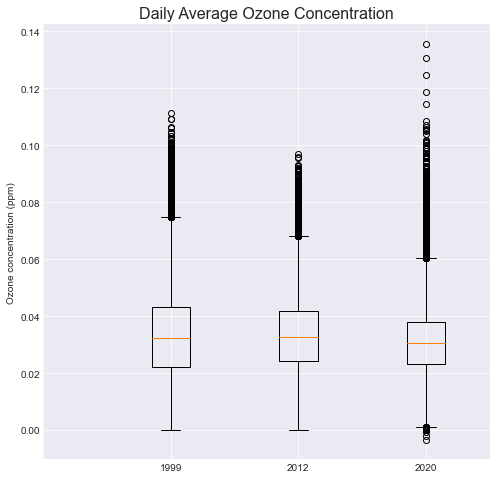

In [27]:
#make boxplots
plt.style.use('seaborn-darkgrid')
#sns.set(rc={'figure.figsize': (8,8)})
fig = plt.figure(figsize = [8, 8]) #make larger
years = [x0Updated, x1Updated, x2Updated]
plt.boxplot(years)
plt.title('Daily Average Ozone Concentration', fontsize=16)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('Ozone concentration (ppm)')

In [28]:
plt.close()

The boxplot shows similar median ozone concentrations across the three years, with the median ozone concentration in 2020 slightly lower. The range of data in 1999 is the highest. The interquartile range decreases from 1999 to 2020. The 2020 dataset has the most outliers.


Text(0, 0.5, 'Ozone concentration (ppm)')

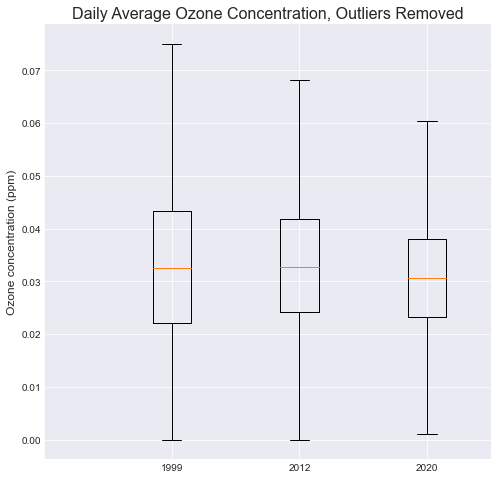

In [29]:
#re-create the boxplots removing the outliers to better visualize the distribution
fig1 = plt.figure(figsize = [8, 8]) #make larger
years = [x0Updated, x1Updated, x2Updated]
plt.boxplot(years, showfliers=False)
plt.title('Daily Average Ozone Concentration, Outliers Removed', fontsize=16)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('Ozone concentration (ppm)', fontsize=12)

In [30]:
plt.close()

Text(0.5, 0, '')

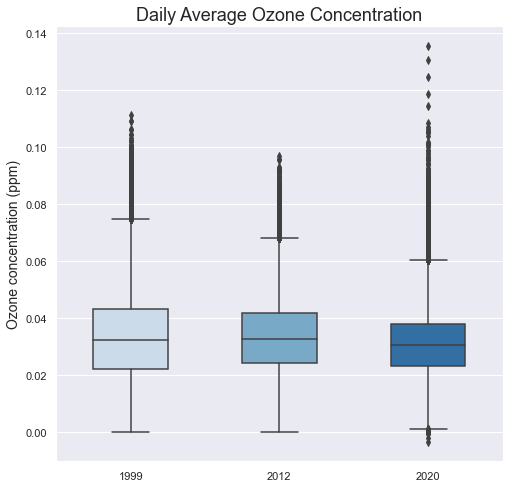

In [31]:
#Re-create boxplots using seaborn boxplots  
#Create separate dataframes for arithmetic year series, add a year column and combine dataframes
#Code modified from https://stackoverflow.com/questions/42004381/box-plot-of-a-many-pandas-dataframes
df0 = pd.DataFrame(x0Updated.to_frame()).assign(Year=1999)
df1 = pd.DataFrame(x1Updated.to_frame()).assign(Year=2012)
df2 = pd.DataFrame(x2Updated.to_frame()).assign(Year=2020)
cdf = pd.concat([df0, df1, df2])
sns.set(rc={'figure.figsize': (8,8)})
ax = sns.boxplot(x="Year", y="Arithmetic Mean", data=cdf, width = 0.5, palette='Blues')  
ax.set_title('Daily Average Ozone Concentration', fontsize=18)
ax.set_ylabel('Ozone concentration (ppm)', fontsize=14)
ax.set_xlabel('')



In [32]:
plt.close()

Text(0.5, 0, '')

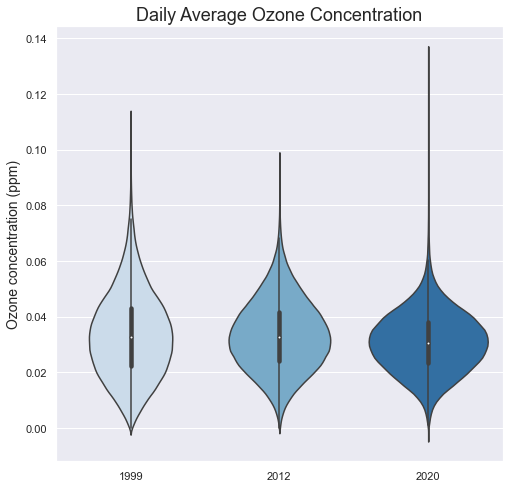

In [33]:
#make a violin plot
sns.set(rc={'figure.figsize': (8,8)})
ax = sns.violinplot(x = 'Year', y = 'Arithmetic Mean', data = cdf, palette = 'Blues')
ax.set_title('Daily Average Ozone Concentration', fontsize=18)
ax.set_ylabel('Ozone concentration (ppm)', fontsize=14)
ax.set_xlabel('')

In [34]:
plt.close()

<Figure size 576x576 with 0 Axes>

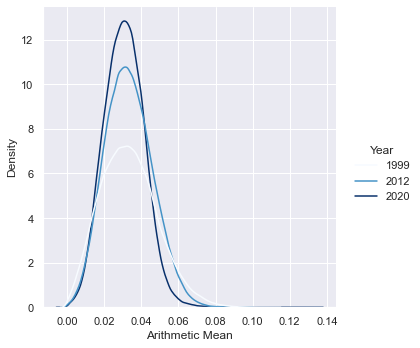

In [35]:
#make a kde plot
plt.figure(figsize= (8,8))
sns.displot(cdf, x='Arithmetic Mean', hue = "Year", kind = 'kde', palette='Blues')

In [36]:
plt.close()

### How have state levels of ozone changed over time?

In [37]:
#calculate the ozone for each state in 1999, 2012, and 2020
mn0 = ozone0Recleaned['Arithmetic Mean'].groupby(ozone0Recleaned['State Code']).mean()
mn1 = ozone1ReCleaned['Arithmetic Mean'].groupby(ozone1ReCleaned['State Code']).mean()
mn2 = ozone2ReCleaned['Arithmetic Mean'].groupby(ozone2ReCleaned['State Code']).mean()

In [38]:
#Make separate data frames for states / years
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d2 = pd.DataFrame(mn2.to_frame().reset_index())

### Compare 1999 and 2012 ozone levels

In [39]:
#check data types of state codes in dataframes before merging
print(d0.info())
print(d1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State Code       53 non-null     object 
 1   Arithmetic Mean  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 976.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State Code       52 non-null     int64  
 1   Arithmetic Mean  52 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes
None


In [40]:
#convert d0 State code from object to int so merge can occur
d0['State Code'] = d0['State Code'].astype(int)

In [41]:
mrg = pd.merge(d0, d1, on = 'State Code')
mrg.head()

,State Code,Arithmetic Mean_x,Arithmetic Mean_y
0,1,0.034291,0.030212
1,2,0.030860,0.023342
2,4,0.038655,0.037280
3,5,0.032148,0.033581
4,6,0.031329,0.032747


[Text(1, 0, '1999'), Text(3, 0, '2012')]

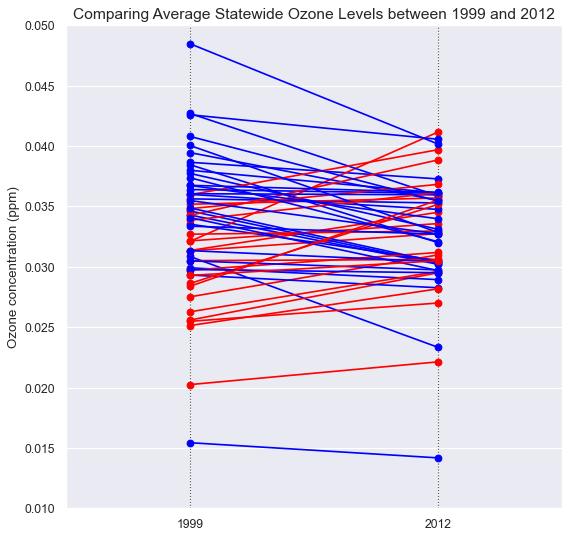

In [42]:
#Code for this plot was modified from slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['Arithmetic Mean_x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['Arithmetic Mean_y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(mrg['Arithmetic Mean_x'], mrg['Arithmetic Mean_y'], mrg['State Code']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title("Comparing Average Statewide Ozone Levels between 1999 and 2012", fontsize=14)
ax.set(xlim=(0,4), ylim=(0.01,0.05), ylabel='Ozone concentration (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(["1999", "2012"])

More states have decreased ozone levels from 1999 to 2012 than increased levels. Increases are depicted with red lines.

In [43]:
plt.close()

### Compare 2012 and 2020 ozone levels

In [44]:
#check data types of state codes in 2020 dataframe before merging
print(d2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State Code       52 non-null     int64  
 1   Arithmetic Mean  52 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes
None


In [45]:
mrg1 = pd.merge(d1, d2, on = 'State Code')
mrg1.head()

,State Code,Arithmetic Mean_x,Arithmetic Mean_y
0,1,0.030212,0.026128
1,2,0.023342,0.027887
2,4,0.037280,0.037082
3,5,0.033581,0.027907
4,6,0.032747,0.032082


[Text(1, 0, '2012'), Text(3, 0, '2022')]

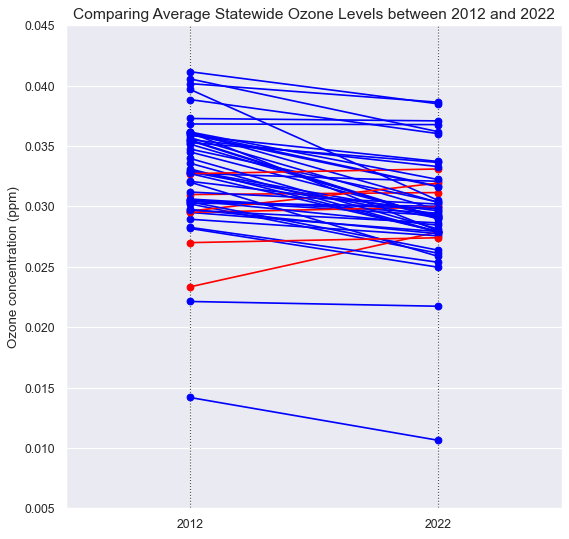

In [46]:
#Code for this plot was modified from slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg1['Arithmetic Mean_x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Arithmetic Mean_y'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(mrg1['Arithmetic Mean_x'], mrg1['Arithmetic Mean_y'], mrg1['State Code']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title('Comparing Average Statewide Ozone Levels between 2012 and 2022', fontsize=14)
ax.set(xlim=(0,4), ylim=(0.005,0.045), ylabel='Ozone concentration (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2022'])

Most states have decreased average ozone levels from 2012 to 2020. A handful of states
have increased average levels; increases are depicted with red lines.

In [47]:
plt.close()

### Which states have the highest levels of ozone?


In [48]:
#Need a new datafile from AQS on site information
#This was completed in the PM2.5 studies and copied/pasted into this ozone notebook
sites = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\aqs_sites.csv')


In [49]:
sitesSubset = sites[['State Code', 'State Name']]
sitesStateNames = sitesSubset['State Name'].unique()
sitesStateNames
#remove 'Country Of Mexico' and 'Canada' but leave in Guam, Puerto Rico, and Virgin Islands
cleanedSitesStateNames = np.delete(sitesStateNames, [-2, -1]) #by index
cleanedSitesStateNames

sitesStateCodes = sitesSubset['State Code'].unique()
sitesStateCodes
#remove the last two elements that correspond with Mexico and Canada
cleanedSitesStateCodes = np.delete(sitesStateCodes, [-2, -1]) #by index
cleanedSitesStateCodes

cleanedSites = pd.DataFrame(data = [cleanedSitesStateNames, cleanedSitesStateCodes]).T
cleanedSites.columns = ['State Name', 'State Code']
cleanedSites

cleanedSites['State Code'] = cleanedSites['State Code'].astype(int)
cleanedSites
print(cleanedSites.info())
print(cleanedSites)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Name  54 non-null     object
 1   State Code  54 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 776.0+ bytes
None
              State Name  State Code
0                Alabama           1
1                 Alaska           2
2                Arizona           4
3               Arkansas           5
4             California           6
5               Colorado           8
6            Connecticut           9
7               Delaware          10
8   District Of Columbia          11
9                Florida          12
10               Georgia          13
11                Hawaii          15
12                 Idaho          16
13              Illinois          17
14               Indiana          18
15                  Iowa          19
16                Kansas          20
17          

In [50]:
d0merged = d0.merge(cleanedSites, on='State Code', how = 'left')
d0TopTen = d0merged.sort_values('Arithmetic Mean', ascending = False).head(10)
d0TopTen

,State Code,Arithmetic Mean,State Name
50,56,0.048473,Wyoming
12,16,0.042701,Idaho
44,49,0.042589,Utah
42,47,0.040800,Tennessee
33,37,0.040049,North Carolina
17,21,0.039459,Kentucky
2,4,0.038655,Arizona
10,13,0.038457,Georgia
14,18,0.037993,Indiana
24,28,0.037736,Mississippi


Text(0.5, 1.0, '1999 Highest Average Concentrations of Ozone')

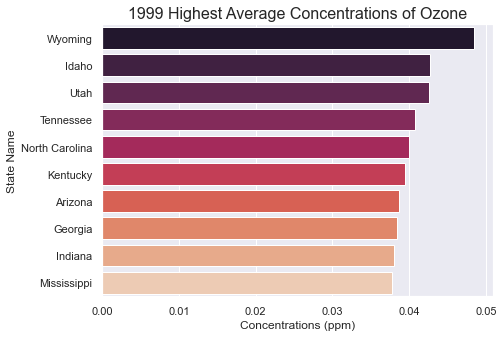

In [51]:
#create barplots
sns.set(rc={'figure.figsize': (7,5)})
sns.barplot(x = d0TopTen['Arithmetic Mean'], y = d0TopTen['State Name'], palette = 'rocket')
plt.xlabel('Concentrations (ppm)')
plt.title('1999 Highest Average Concentrations of Ozone', fontsize = 16)

In [52]:
plt.close()

In [53]:
#repeat top ten visualizations for years 2012 and 2020
d1merged = d1.merge(cleanedSites, on='State Code', how = 'left')
d1TopTen = d1merged.sort_values('Arithmetic Mean', ascending = False).head(10)
d1TopTen

,State Code,Arithmetic Mean,State Name
5,8,0.041155,Colorado
44,49,0.040562,Utah
50,56,0.040170,Wyoming
25,29,0.039694,Missouri
28,32,0.038848,Nevada
2,4,0.037280,Arizona
31,35,0.036827,New Mexico
49,55,0.036166,Wisconsin
36,40,0.036145,Oklahoma
14,18,0.036128,Indiana


Text(0.5, 1.0, '2012 Highest Average Concentrations of Ozone')

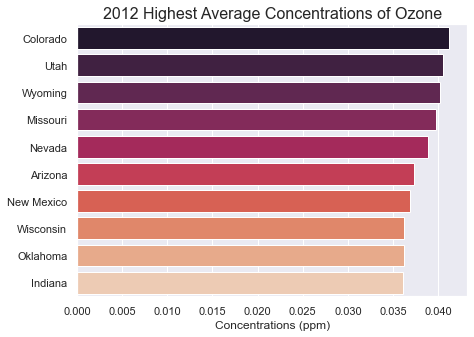

In [54]:
sns.barplot(x = d1TopTen['Arithmetic Mean'], y = d1TopTen['State Name'], palette = 'rocket')
plt.xlabel('Concentrations (ppm)')
plt.ylabel('')
plt.title('2012 Highest Average Concentrations of Ozone', fontsize=16)

In [55]:
plt.close()

In [56]:
d2merged = d2.merge(cleanedSites, on='State Code', how = 'left')
d2TopTen = d2merged.sort_values('Arithmetic Mean', ascending = False).head(10)
d2TopTen

,State Code,Arithmetic Mean,State Name
50,56,0.038629,Wyoming
5,8,0.038497,Colorado
2,4,0.037082,Arizona
31,35,0.036774,New Mexico
44,49,0.036190,Utah
28,32,0.036031,Nevada
12,16,0.033721,Idaho
6,9,0.033645,Connecticut
41,46,0.033302,South Dakota
39,44,0.033101,Rhode Island


Text(0.5, 1.0, '2020 Highest Average Concentrations of Ozone')

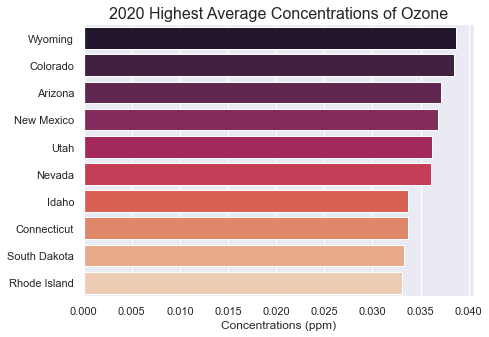

In [57]:
sns.barplot(x = d2TopTen['Arithmetic Mean'], y = d2TopTen['State Name'], palette = 'rocket')
plt.xlabel('Concentrations (ppm)')
plt.ylabel('')
plt.title('2020 Highest Average Concentrations of Ozone', fontsize=16)

In [58]:
plt.close()

### Which states have the lowest levels of ozone?

Text(0.5, 1.0, '1999 Lowest Average Concentrations of Ozone')

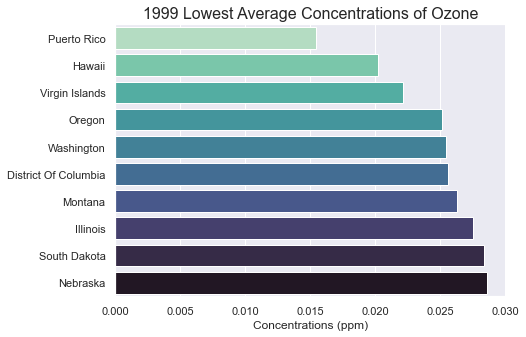

In [59]:
d0LowestTen = d0merged.sort_values('Arithmetic Mean').head(10)
sns.barplot(x = d0LowestTen['Arithmetic Mean'], y = d0LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Concentrations (ppm)')
plt.ylabel('')
plt.title('1999 Lowest Average Concentrations of Ozone', fontsize=16)

In [60]:
plt.close()

Text(0.5, 1.0, '2012 Lowest Average Concentrations of Ozone')

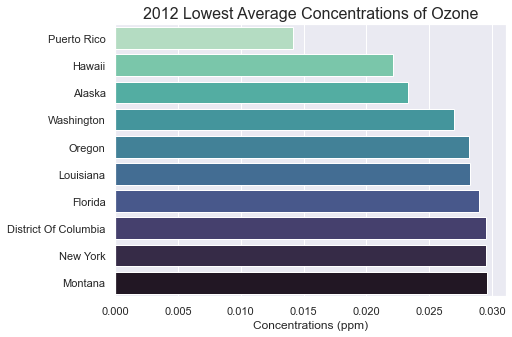

In [61]:
d1LowestTen = d1merged.sort_values('Arithmetic Mean').head(10)
sns.barplot(x = d1LowestTen['Arithmetic Mean'], y = d1LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Concentrations (ppm)')
plt.ylabel('')
plt.title('2012 Lowest Average Concentrations of Ozone', fontsize=16)

In [62]:
plt.close()

Text(0.5, 1.0, '2020 Lowest Average Concentrations of Ozone')

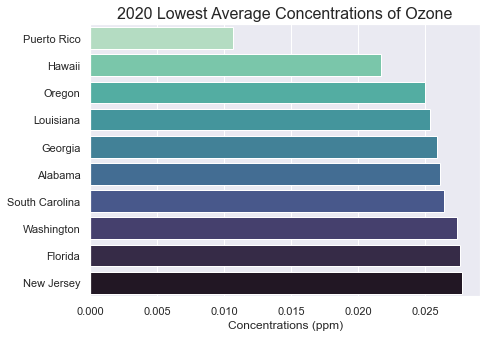

In [63]:
d2LowestTen = d2merged.sort_values('Arithmetic Mean').head(10)
sns.barplot(x = d2LowestTen['Arithmetic Mean'], y = d2LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Concentrations (ppm)')
plt.ylabel('')
plt.title('2020 Lowest Average Concentrations of Ozone', fontsize=16)

In [64]:
plt.close()